# DBSCAN

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("crime_data.csv")
df=pd.DataFrame(data)
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df=df.drop(['State'],axis=1)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [4]:
array=df.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

### Normalising data

In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm=norm_func(df.iloc[:,1:]) 
df_norm.head()

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465


### Standardising Data

In [7]:
stscaler = StandardScaler().fit(array) 
X = stscaler.transform(array) 

In [8]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## to find eps

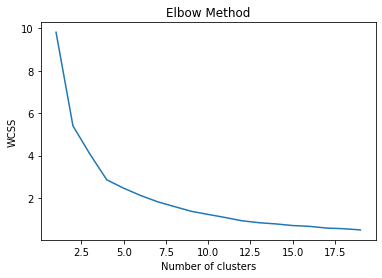

In [21]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 20): #1 to 20
    kmeans = KMeans(n_clusters=i,random_state=0) 
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)# inertia=twss
    
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
wcss

[9.81079986191271,
 5.4022284074736735,
 4.0770020187159,
 2.8621772882774135,
 2.466390970422787,
 2.12323908692003,
 1.8285343339695637,
 1.601089778030826,
 1.3782771379609806,
 1.2308639317164642,
 1.0866315623479912,
 0.9320294698749492,
 0.8419024241712081,
 0.7842878818809327,
 0.707270872962754,
 0.6689677793704923,
 0.5889316006118106,
 0.5590046224010379,
 0.5018016513368195]

## DBSCAN algo

In [15]:
dbscan = DBSCAN(eps=2, min_samples=8)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=8)

## 0 is the cluster and -1 is noise

In [16]:
labels=dbscan.labels_ 
labels

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [17]:
cls1=pd.DataFrame(labels,columns=['Cluster'])

In [18]:
cls1

,Cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [19]:
df_new=pd.concat([df,cls1],axis=1)

In [20]:
df_new

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0
